<a href="https://colab.research.google.com/github/cacurio/API-Restful/blob/master/reconocimineto_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch

from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

In [3]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth


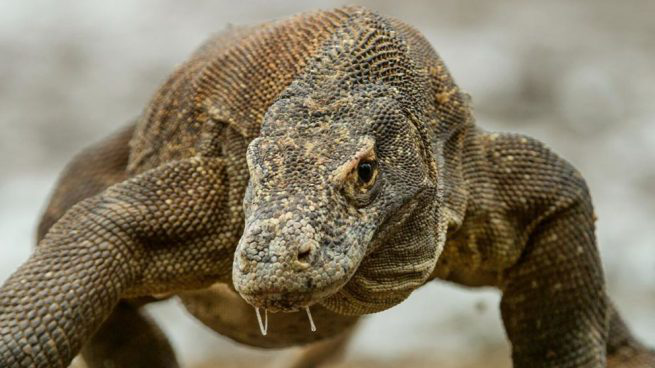

In [49]:
url = 'https://okdiario.com/img/2019/12/01/curiosidades-del-del-dragon-de-komodo-655x368.jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

In [0]:
preprocess = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


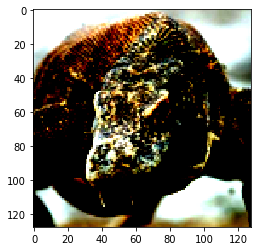

In [51]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1, 2, 0))

In [0]:
inception.eval()

In [0]:
out = inception(batch)
out

In [0]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [0]:
_, index = torch.max(out, 1)

In [56]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis',
 99.9999771118164)

In [57]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis 99.9999771118164
common iguana, iguana, Iguana iguana 2.186681012972258e-05
frilled lizard, Chlamydosaurus kingi 4.976067771167436e-07
Gila monster, Heloderma suspectum 3.487647726174714e-09
bullfrog, Rana catesbeiana 2.219090744493002e-10
